# PXD019823
## PARP-1 activation after oxidative insult promotes energy stress-dependent phosphorylation of YAP1 and reduces cell viability

[Pride link](https://www.ebi.ac.uk/pride/archive/projects/PXD019823)

[Article link](https://portlandpress.com/biochemj/article-abstract/477/23/4491/226892/PARP-1-activation-after-oxidative-insult-promotes?redirectedFrom=fulltext)

In [379]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)

<module 'OxiAnalysis' from '/home/robbe/ionbot/OxiAnalysis.py'>

Important! In this experiment, phosphopeptides were enriched

In [247]:
first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD019823_first.csv")
del first["Unnamed: 0"]
del first["spectrum_title"]
del first["scan"]
first['modifications'] = first['modifications'].fillna("None")
first['Oxidant treatment'] = first['Oxidant treatment'].fillna("None")
first['Secondary treatment'] = first['Secondary treatment'].fillna("None")
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].fillna(0)
first['Length of oxidant treatment (mins)'] = first['Length of oxidant treatment (mins)'].replace('0', 0)


In [248]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_6427_1,QE1_Sandra_PP_Exp1_Sample10,2898.32310,28183.5933,2097.45624,4,GEAAAERPGEAAVASSPSKANGQENGHVK,GEAAAERPGEAAVASSPSKANGQENGHVK,16|[21]Phospho[S],16|79.9663,...,Human,WRL68,None,0,PARP-1 targeting siRNA,0.05,0,0,NaN,First
1,0_6428_1,QE1_Sandra_PP_Exp1_Sample10,1968.73350,18088.0241,2097.58776,2,KNSSTDQGSDEEGSIQK,KNSSTDQGSDEEGSIQK,4|[898]pyrophospho[S],4|159.9327,...,Human,WRL68,None,0,PARP-1 targeting siRNA,0.05,0,0,NaN,First
2,0_6432_1,QE1_Sandra_PP_Exp1_Sample10,1132.52903,10525.6142,2098.10700,2,QGSPVAAGAPAK,QGSPVAAGAPAK,3|[21]Phospho[S],3|79.9663,...,Human,WRL68,None,0,PARP-1 targeting siRNA,0.05,0,0,NaN,First
3,0_6436_1,QE1_Sandra_PP_Exp1_Sample10,1032.47471,9525.0900,2098.81416,2,VQNSPPVGR,VQNSPPVGR,4|[21]Phospho[S],4|79.9663,...,Human,WRL68,None,0,PARP-1 targeting siRNA,0.05,0,0,NaN,First
4,0_6439_4,QE1_Sandra_PP_Exp1_Sample10,1180.55955,10445.5635,2099.09028,2,AGDNKNSVIK,AGDNKNSVIK,7|[735]BEMAD_ST[S],7|136.0017,...,Human,WRL68,None,0,PARP-1 targeting siRNA,0.05,0,0,NaN,First


In [249]:
print("The amount of PSMs in this project dataset is: ", first.shape[0])
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of PSMs in this project dataset is:  262098
The amount of raw files that make up the master dataset is:  48


In [250]:
first['Peptidoform_name'] = first.apply(lambda row: OA.peptidoform_name(row), axis=1)
first['Position'] = first['modifications'].apply(OA.get_positions)
first['Modification'] = first['modifications'].apply(OA.get_modification)
first['Oxidatively_modified'] = first['modifications'].apply(OA.oxidatively_modified)
#A mistake slipped in the annotation, QE1_Sandra_PP_Exp1_Sample5 was wrongly annotated
first.loc[first['spectrum_file'] == "QE1_Sandra_PP_Exp1_Sample5", 'Oxidant dose (µM)'] = 0
first.loc[first['spectrum_file'] == "QE1_Sandra_PP_Exp1_Sample5", 'Length of oxidant treatment (mins)'] = 0
first.loc[first['spectrum_file'] == "QE1_Sandra_PP_Exp1_Sample5", 'Secondary treatment dose (µM)'] = 0
first.loc[first['spectrum_file'] == "QE1_Sandra_PP_Exp1_Sample5", 'Secondary treatment'] = "None"

## Overview of the treatments in this project

In [251]:
first.groupby(["Oxidant treatment", "Oxidant dose (µM)", "Length of oxidant treatment (mins)", "Secondary treatment", "Secondary treatment dose (µM)", 'Length of Secondary treatment (mins)'])["ionbot_match_id"].count().to_frame().reset_index()

,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),ionbot_match_id
0,H2O2,3500,30,NAD+,250.00,0,33882
1,H2O2,3500,30,None,0.00,0,66417
2,H2O2,3500,30,PARP-1 targeting siRNA,0.05,0,27781
3,H2O2,3500,30,PJ34 (PARP-1 inhibitor),1.00,0,35235
4,None,0,0,None,0.00,0,71314
5,None,0,0,PARP-1 targeting siRNA,0.05,0,27469


### Conditions that will be compared

| Treatment | Treatment 2 |
| ----------- | ----------- |
| H202 + None| None + None |
| H2O2 + NAD+ | H2O2 + None |
| H2O2 + PARP-1 targeting siRNA | H2O2 + None |
| H2O2 + PJ34 | H2O2 + None |
| H2O2 + PARP-1 targeting siRNA | None + PARP-1 targeting siRNA |



In [252]:
H2O2 = first.loc[lambda first: (first["Oxidant treatment"] == "H2O2") & (first["Secondary treatment"] == "None")]
Control = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Secondary treatment"] == "None")]
NAD = first.loc[lambda first: first["Secondary treatment"] == "NAD+"]
H2O2_siRNA = first.loc[lambda first: (first["Oxidant treatment"] == "H2O2") & (first["Secondary treatment"] == "PARP-1 targeting siRNA")]
Control_siRNA = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Secondary treatment"] == "PARP-1 targeting siRNA")]
PJ34 = first.loc[lambda first: first["Secondary treatment"] == "PJ34 (PARP-1 inhibitor)"]

## Comparison between the treatments
### 1) H2O2 vs Control

In [253]:
print("There are this many replicates of each treatment: {}".format(H2O2["spectrum_file"].nunique()))


There are this many replicates of each treatment: 12


In [254]:
H2O2rep = OA.replicate_filter(H2O2, 6)
Controlrep = OA.replicate_filter(Control, 6)

In [255]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: {}".format((H2O2rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: 5.961015412511332 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 2.918733307897749 %


In [256]:
mrH2O2rep = OA.modratios(H2O2rep)
mrControlrep = OA.modratios(Controlrep)

In [257]:
modr = pd.merge(mrH2O2rep,mrControlrep, on="Modification", suffixes=('_H2O2', '_Control'))
modr["Difference"] = modr["Ratios_H2O2"] - modr["Ratios_Control"]
modr = modr.drop(modr[(modr["Ratios_H2O2"] == 0) & (modr["Ratios_Control"] == 0)].index)
modr

,Modification,Ratios_H2O2,Ratios_Control,Difference
8,[35]Oxidation[W],0.000000,0.005166,-0.005166
23,[53]HNE[A],0.012270,0.000000,0.012270
33,[345]Trioxidation[C],0.021871,0.003450,0.018421
73,[421]Sulfide[C],0.059579,0.023662,0.035917
76,[425]Dioxidation[C],0.023058,0.007446,0.015613
105,[937]dichlorination[Y],0.001241,0.000000,0.001241
121,[1922]Pro->HAVA[P],0.000000,0.000577,-0.000577
129,[35]oxidation[M],0.175205,0.045179,0.130026


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


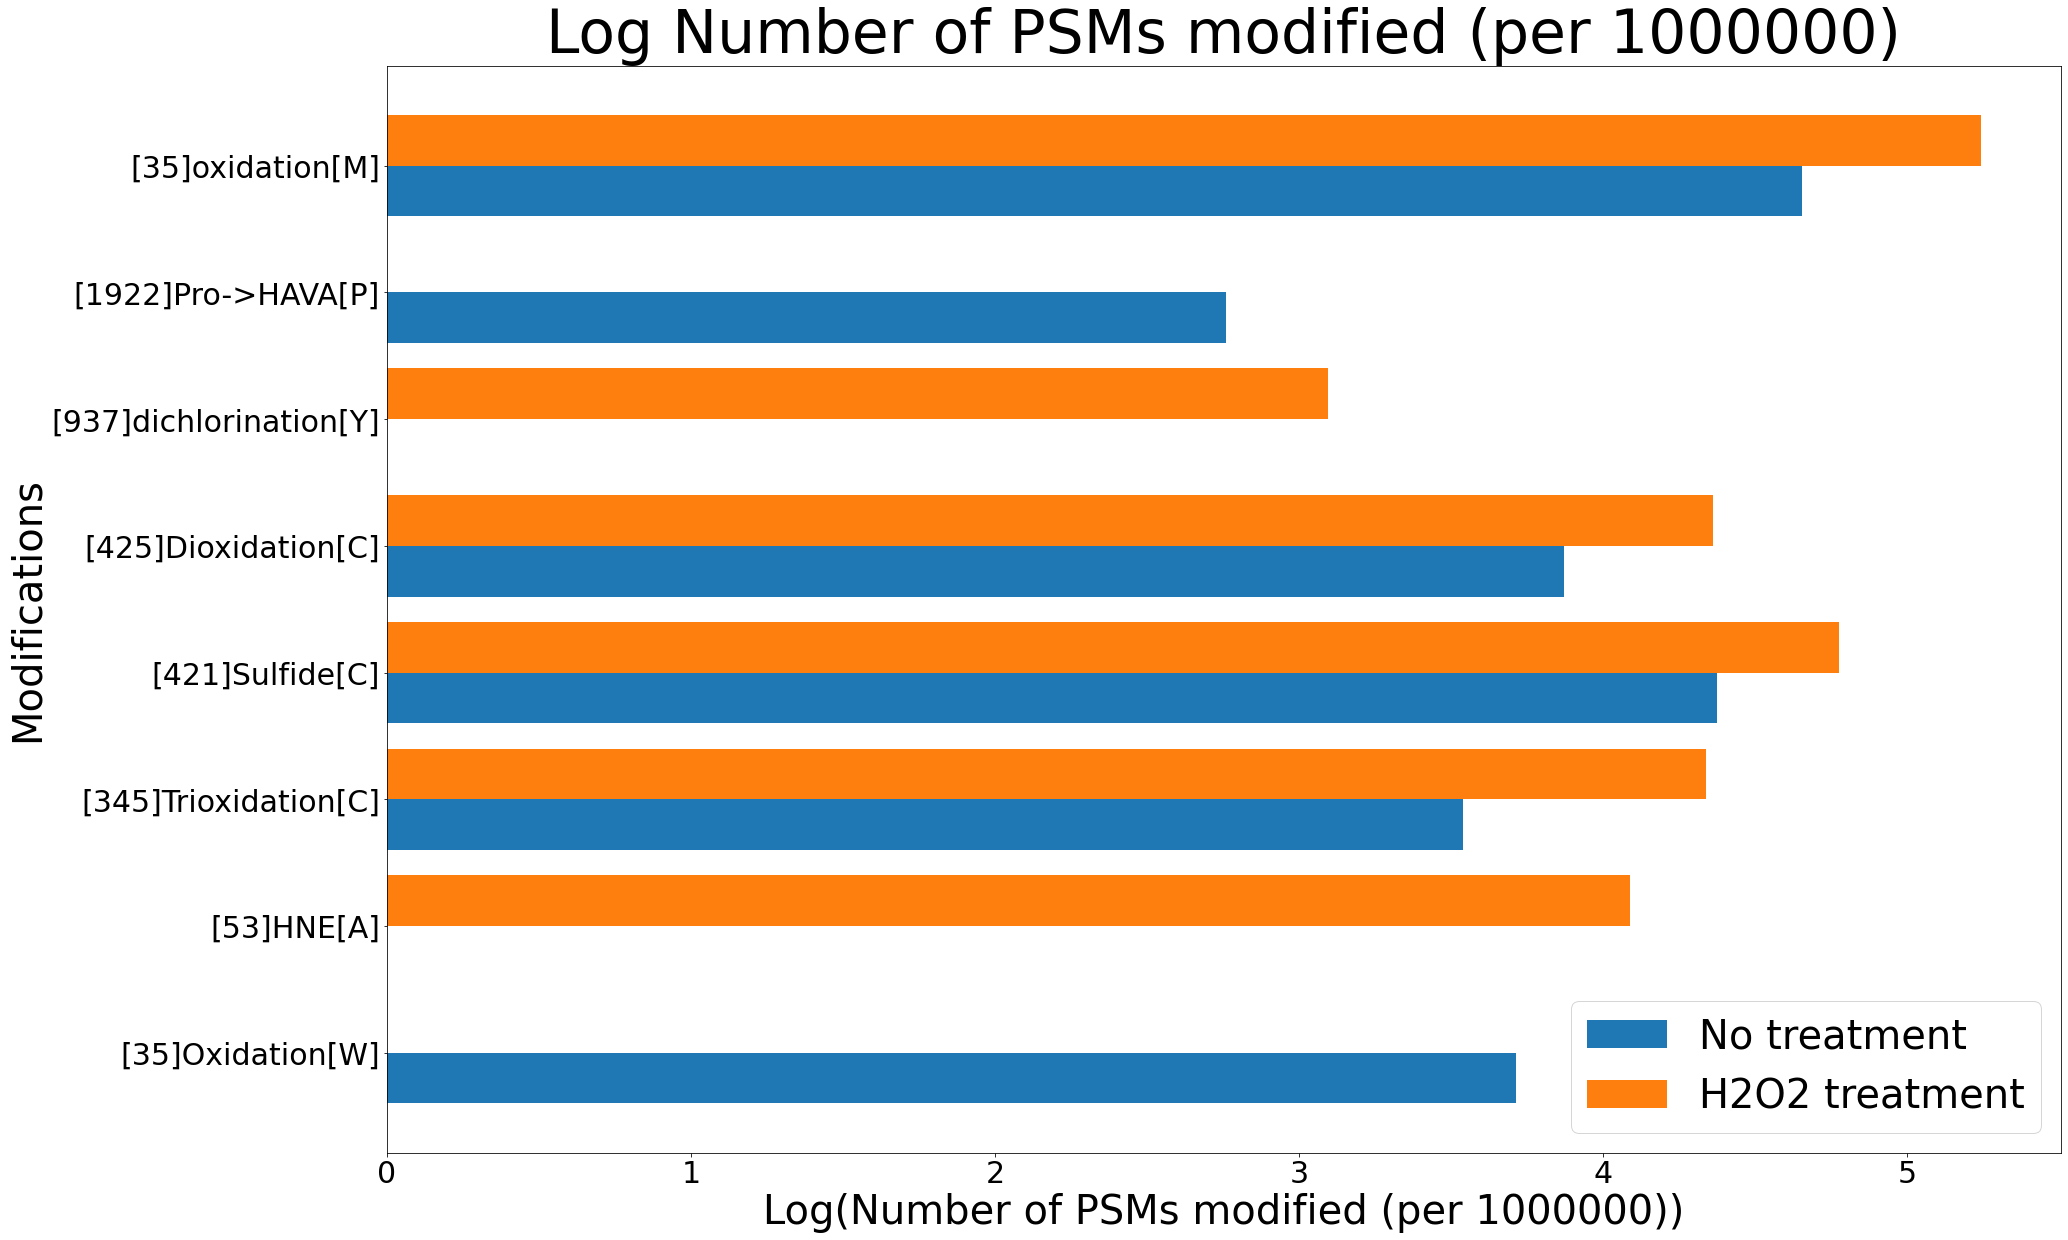

In [258]:
y = modr["Modification"]
xnone = np.log10(modr['Ratios_Control']*1000000)
xH = np.log10(modr['Ratios_H2O2']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 40)
plt.show()

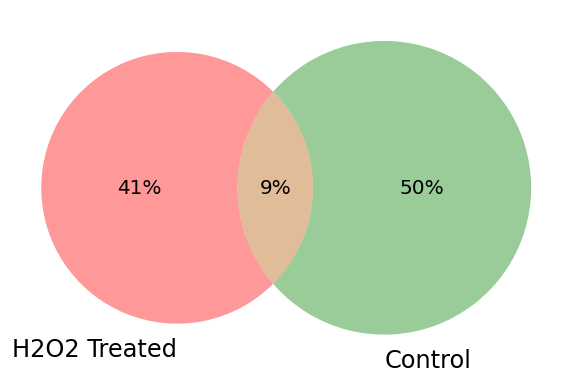

In [259]:
OA.condition_venn([H2O2rep, Controlrep], ["H2O2 Treated", "Control"])

In [260]:
difflist, pf_only_treatment = OA.comparelist(H2O2rep,Controlrep)
pf_only_treatment.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
6898,0_6546_2,QE1_Sandra_PP_Exp1_Sample11,1221.53928,11415.7274,2105.88438,2,NINPSTANSPK,NINPSTANSPK,6|[21]Phospho[T],6|79.9663,...,None,0.0,30,0,NaN,First,NINPST[21]PhosphoANSPK,|,[21]Phospho[T],False
6919,0_6604_1,QE1_Sandra_PP_Exp1_Sample11,984.44138,9044.7663,2114.10888,2,SPSPAPPPR,SPSPAPPPR,1|[21]Phospho[S],1|79.9663,...,None,0.0,30,0,NaN,First,S[21]PhosphoPSPAPPPR,|,[21]Phospho[S],False
6999,0_6927_1,QE1_Sandra_PP_Exp1_Sample11,988.47226,9884.7263,2160.12240,2,VWETANNR,VWETANNR,None,0|,...,None,0.0,30,0,NaN,First,VWETANNR,|,None,False
7004,0_6956_1,QE1_Sandra_PP_Exp1_Sample11,2899.30830,28183.5933,2164.56588,4,GEAAAERPGEAAVASSPSKANGQENGHVK,GEAAAERPGEAAVASSPSKANGQENGHVK,7|[837]Arg->Npo[R],7|80.9851,...,None,0.0,30,0,NaN,First,GEAAAER[837]Arg->NpoPGEAAVASSPSKANGQENGHVK,|,[837]Arg->Npo[R],False
7095,0_7279_1,QE1_Sandra_PP_Exp1_Sample11,1301.60886,13016.0990,2210.70714,2,EPVETAVDNNSK,EPVETAVDNNSK,None,0|,...,None,0.0,30,0,NaN,First,EPVETAVDNNSK,|,None,False


In [261]:
onlytreatment = OA.modcounts(pf_only_treatment)
onlytreatment = onlytreatment.sort_values("Counts", ascending=False).drop(onlytreatment[onlytreatment["Counts"] == 0].index, axis=0)
onlytreatment

,Modification,Counts
129,[35]oxidation[M],157
73,[421]Sulfide[C],45
33,[345]Trioxidation[C],18
76,[425]Dioxidation[C],13
23,[53]HNE[A],10
105,[937]dichlorination[Y],1


In [262]:
RPMH2O2 = OA.relative_PSM_modification(H2O2rep)
RPMControl = OA.relative_PSM_modification(Controlrep)

In [263]:
RPM = pd.merge(RPMH2O2,RPMControl, on="Amino acid", suffixes=('_H2O2', '_Control'))
RPM

,Amino acid,Relative level of PSMs containing unmodified residue_H2O2,Relative level of PSMs containing unmodified residue_Control
0,A,0.996404,1.000000
1,R,0.946774,0.952529
2,N,0.951323,0.984334
3,D,0.939331,0.956231
4,C,0.052061,0.072727
5,Q,0.985441,0.979351
6,E,0.882217,0.916216
7,G,0.996568,0.996984
8,H,0.932449,0.898693
9,I,1.000000,1.000000


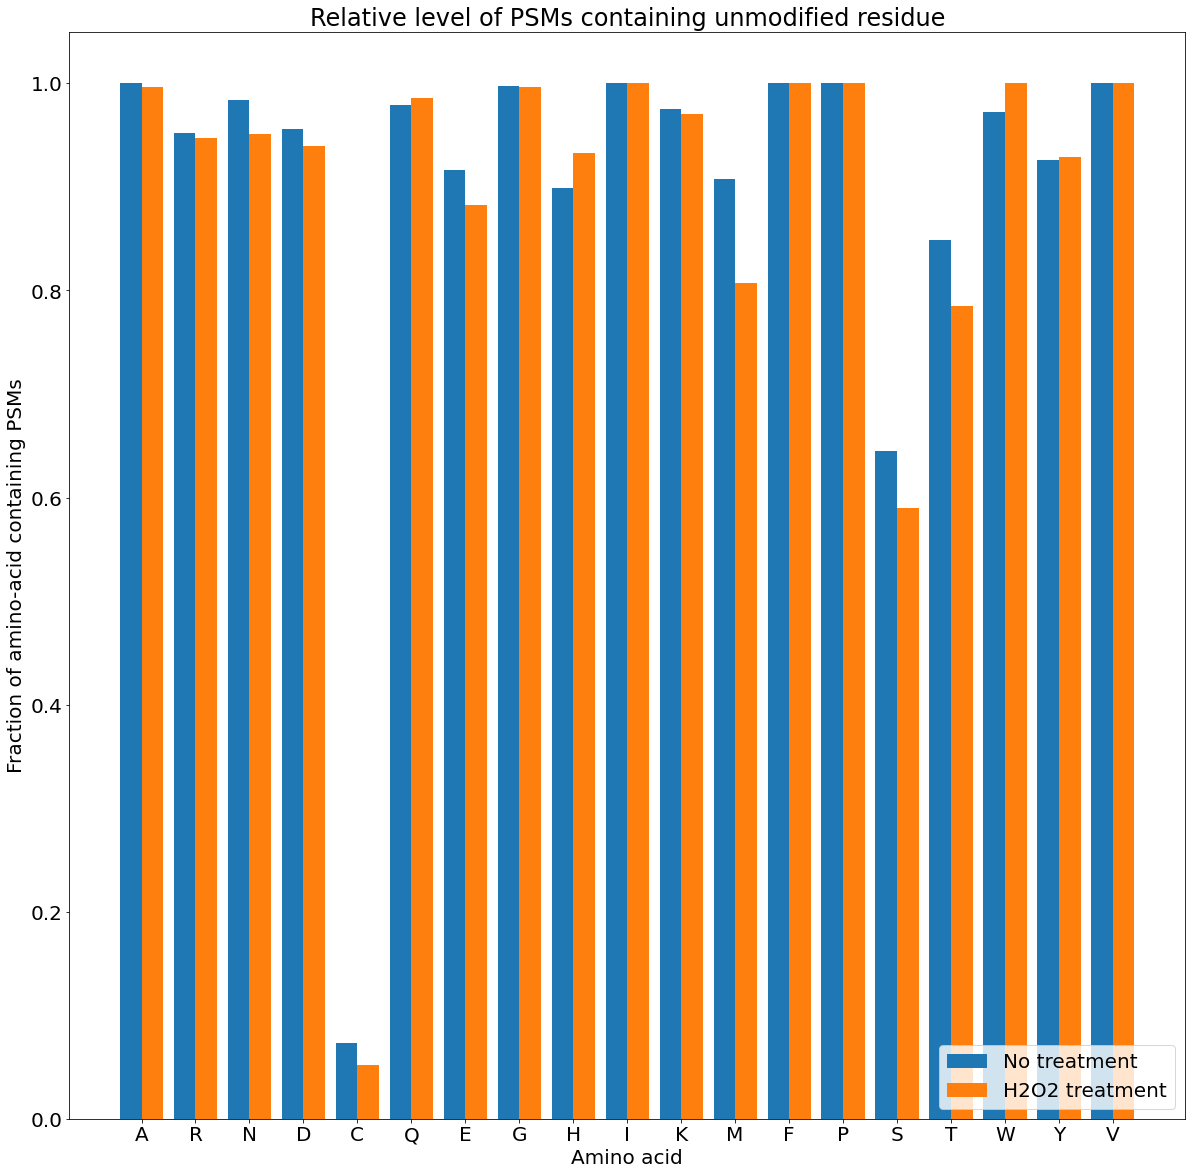

In [264]:
x = RPM["Amino acid"]
xnone = RPM["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM['Relative level of PSMs containing unmodified residue_H2O2']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

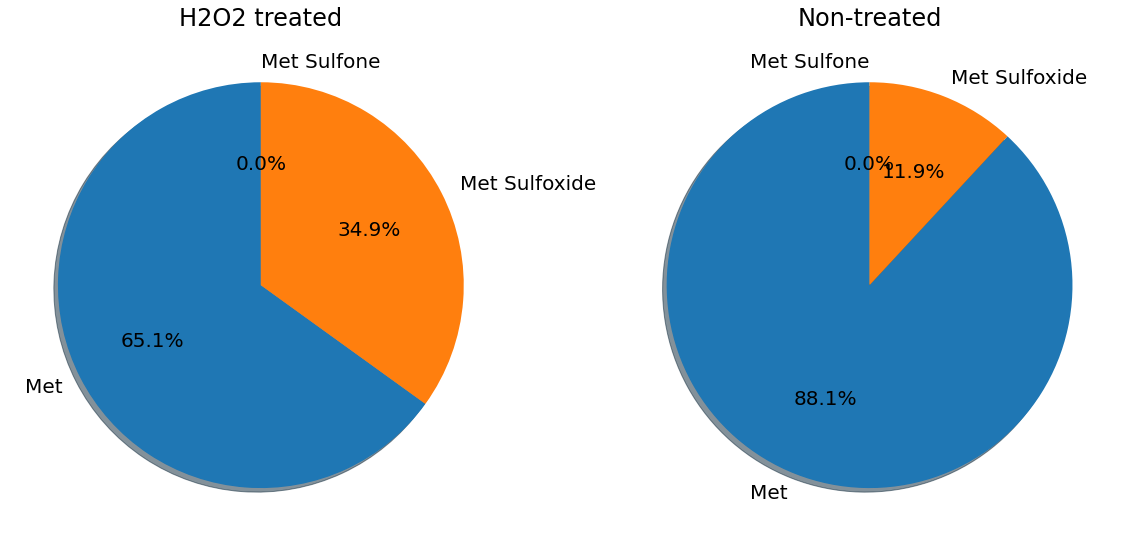

In [265]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(H2O2rep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2 treated")
ax2.set_title("Non-treated")
plt.show()

## 2) H2O2 + NAD+ vs H2O2

NAD+, a donor of ADP-ribose units used by PARP-1 to attach to target proteins. Overactivation of PARP-1 due to oxidative stress can lead to NAD+ depletion, which can lead to cell death

In [266]:
print("There are this many replicates in the H2O2+NAD+ condition: {}".format(NAD["spectrum_file"].nunique()))

There are this many replicates in the H2O2+NAD+ condition: 8


In [267]:
NADrep = OA.replicate_filter(NAD, 4)

In [268]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: {}".format((H2O2rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the H2O2+NAD+ treatment subset: {}".format((NADrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: 5.961015412511332 %
The ratio of PSMs that contain an oxidative modification in the H2O2+NAD+ treatment subset: 4.645227156712608 %


In [269]:
mrNADrep = OA.modratios(NADrep)

In [270]:
modr2 = pd.merge(mrNADrep,mrH2O2rep, on="Modification", suffixes=('_H2O2+NAD', '_H2O2'))
modr2["Difference"] = modr2["Ratios_H2O2+NAD"] - modr2["Ratios_H2O2"]
modr2 = modr2.drop(modr2[(modr2["Ratios_H2O2+NAD"] == 0) & (modr2["Ratios_H2O2"] == 0)].index)
modr2

,Modification,Ratios_H2O2+NAD,Ratios_H2O2,Difference
7,[35]Oxidation[G],0.004494,0.000000,0.004494
10,[35]Oxidation[H],0.004494,0.000000,0.004494
23,[53]HNE[A],0.006726,0.012270,-0.005543
33,[345]Trioxidation[C],0.010056,0.021871,-0.011815
37,[354]Nitro[F],0.004494,0.000000,0.004494
73,[421]Sulfide[C],0.039046,0.059579,-0.020534
76,[425]Dioxidation[C],0.027442,0.023058,0.004384
83,[425]Dioxidation[P],0.004494,0.000000,0.004494
85,[425]Dioxidation[I],0.004494,0.000000,0.004494
103,[936]Chlorination[Y],0.004494,0.000000,0.004494


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


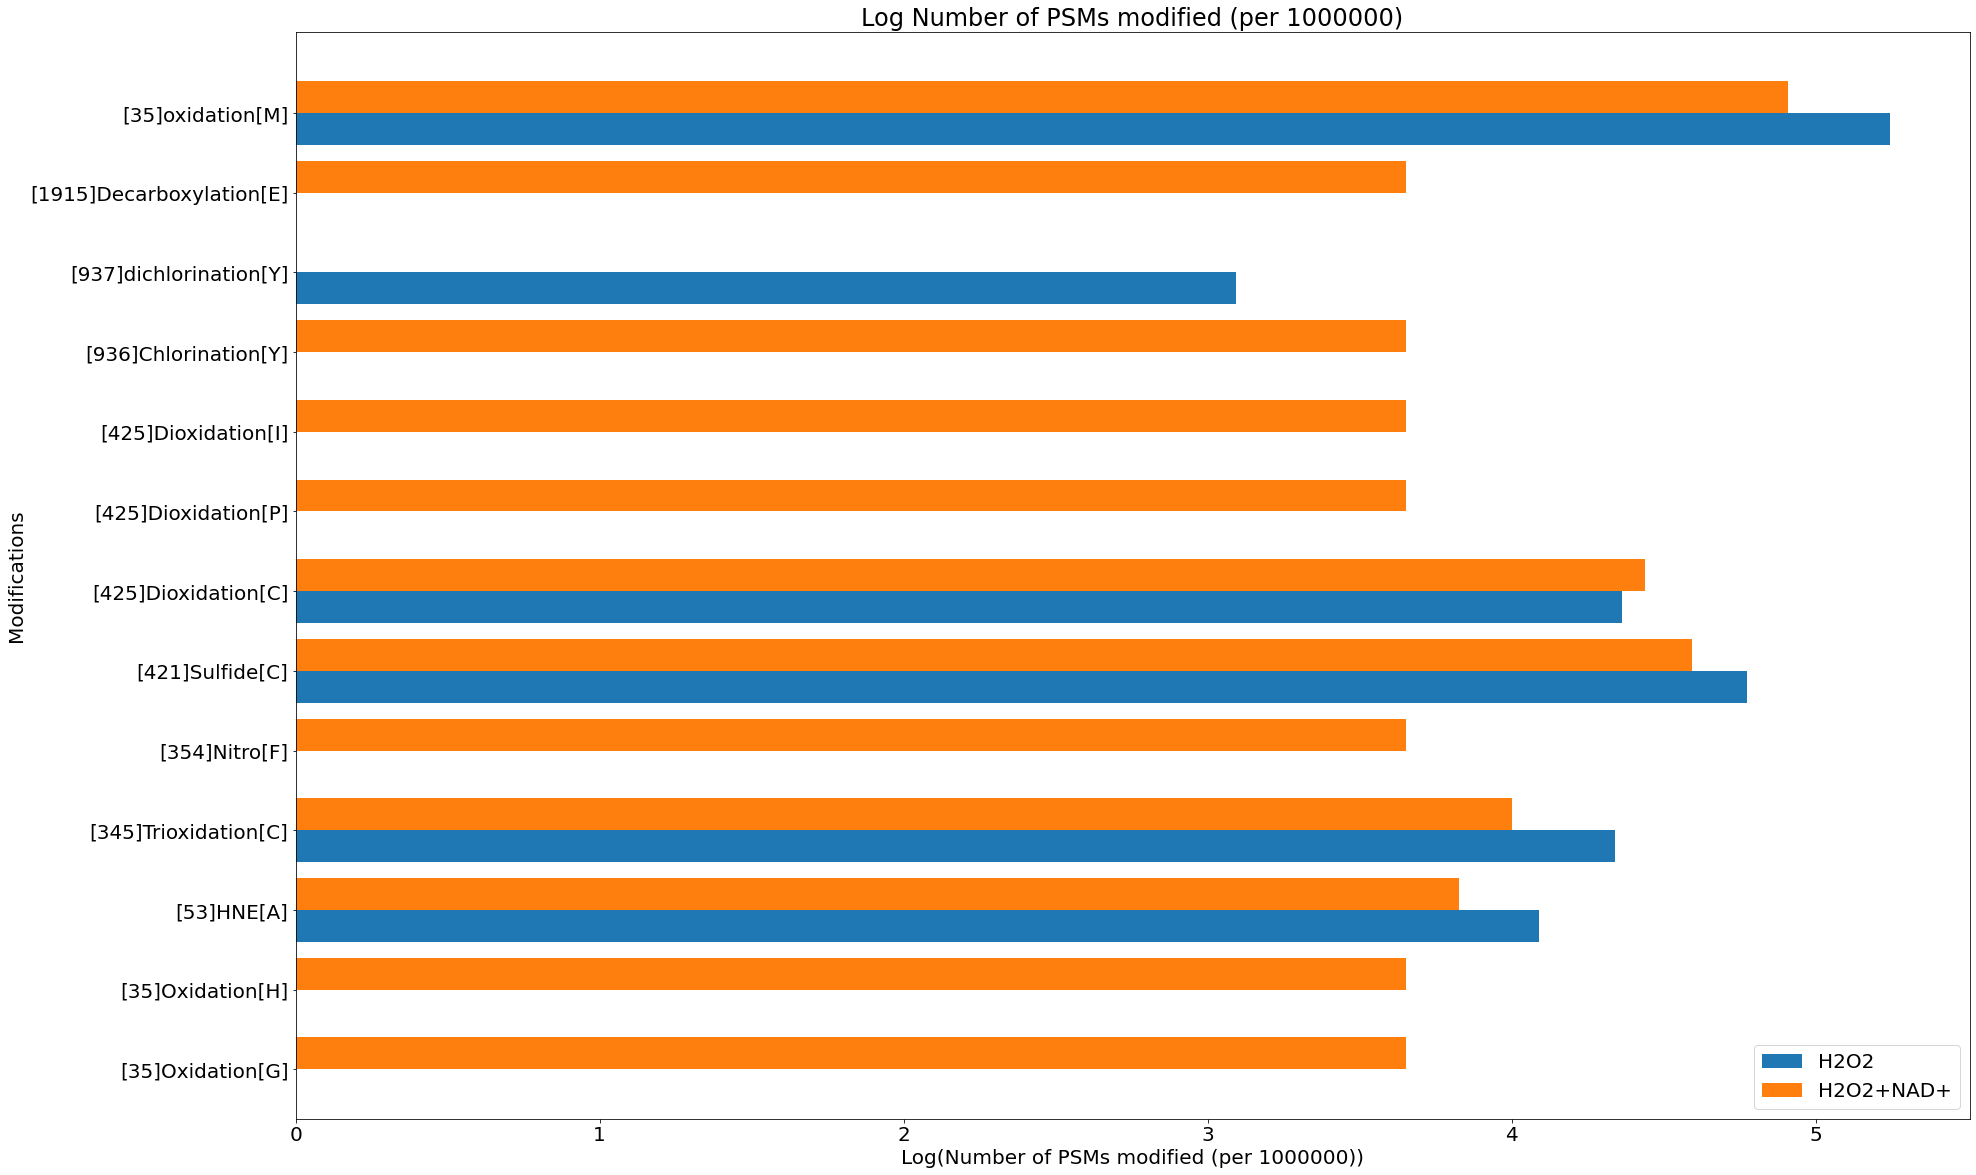

In [271]:
y = modr2["Modification"]
xnone = np.log10(modr2['Ratios_H2O2']*1000000)
xH = np.log10(modr2['Ratios_H2O2+NAD']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'H2O2')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2+NAD+')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

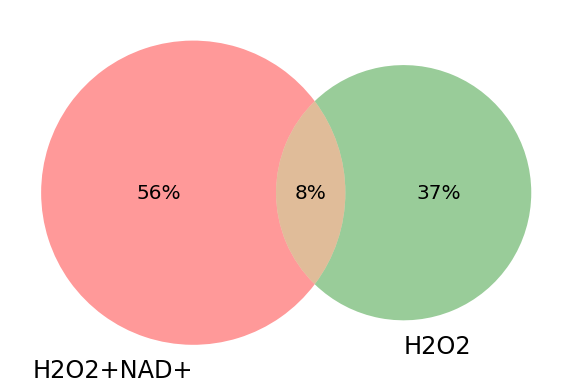

In [272]:
OA.condition_venn([NADrep, H2O2rep], ["H2O2+NAD+","H2O2"])

In [305]:
difflist2, pf_only_treatment2 = OA.comparelist(NADrep,H2O2rep)
pf_only_treatment2.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
142490,0_5913_1,QE1_Sandra_PP_Sample04,2356.12990,22761.6480,2328.27168,4,TKPTQAAGPSSPQKPPTPEETK,TKPTQAAGPSSPQKPPTPEETK,11|[21]Phospho[S],11|79.9663,...,NAD+,250.0,30,0,NaN,First,TKPTQAAGPSS[21]PhosphoPQKPPTPEETK,|,[21]Phospho[S],False
142494,0_5927_1,QE1_Sandra_PP_Sample04,1851.71946,18517.2419,2330.23308,2,SDAEEDGGTVSQEEEDR,SDAEEDGGTVSQEEEDR,None,0|,...,NAD+,250.0,30,0,NaN,First,SDAEEDGGTVSQEEEDR,|,None,False
142503,0_6026_1,QE1_Sandra_PP_Sample04,1381.61083,13016.4761,2345.48670,3,ASPNVEAPQPHR,ASPNVEAPQPHR,6|[21]Phospho[E],6|79.9663,...,NAD+,250.0,30,0,NaN,First,ASPNVE[21]PhosphoAPQPHR,|,[21]Phospho[E],False
142525,0_6204_1,QE1_Sandra_PP_Sample04,1747.70688,16677.4206,2372.32134,2,TSSGTSISAMHSSGSSGK,TSSGTSISAMHSSGSSGK,5|[21]Phospho[T],5|79.9663,...,NAD+,250.0,30,0,NaN,First,TSSGT[21]PhosphoSISAMHSSGSSGK,|,[21]Phospho[T],False
142530,0_6226_1,QE1_Sandra_PP_Sample04,1858.72593,17787.6014,2375.59170,2,GGGSCSGSAGGGGSGSIPSQR,GGGSCSGSAGGGGSGSIPSQR,5|[4]carbamidomethyl[C]|6|[21]Phospho[S],5|57.0215|6|79.9663,...,NAD+,250.0,30,0,NaN,First,GGGSC[4]carbamidomethylS[21]PhosphoGSAGGGGSGSI...,|,"[[4]carbamidomethyl[C], [21]Phospho[S]]",False


In [313]:
onlytreatment2 = OA.modcounts(pf_only_treatment2)
onlytreatment2 = onlytreatment2.sort_values("Counts", ascending=False).drop(onlytreatment2[onlytreatment2["Counts"] == 0].index, axis=0)
onlytreatment2

,Modification,Counts
129,[35]oxidation[M],63
73,[421]Sulfide[C],28
76,[425]Dioxidation[C],21
33,[345]Trioxidation[C],9
37,[354]Nitro[F],4
10,[35]Oxidation[H],4
85,[425]Dioxidation[I],4
103,[936]Chlorination[Y],4
110,[1915]Decarboxylation[E],4
83,[425]Dioxidation[P],4


In [277]:
RPMNAD = OA.relative_PSM_modification(NADrep)

In [278]:
RPM2 = pd.merge(RPMNAD,RPMH2O2, on="Amino acid", suffixes=('_H2O2+NAD', '_H2O2'))
RPM2

,Amino acid,Relative level of PSMs containing unmodified residue_H2O2+NAD,Relative level of PSMs containing unmodified residue_H2O2
0,A,0.992559,0.996404
1,R,0.950000,0.946774
2,N,0.975596,0.951323
3,D,0.951981,0.939331
4,C,0.070136,0.052061
5,Q,0.984716,0.985441
6,E,0.920405,0.882217
7,G,0.998275,0.996568
8,H,0.870968,0.932449
9,I,0.998731,1.000000


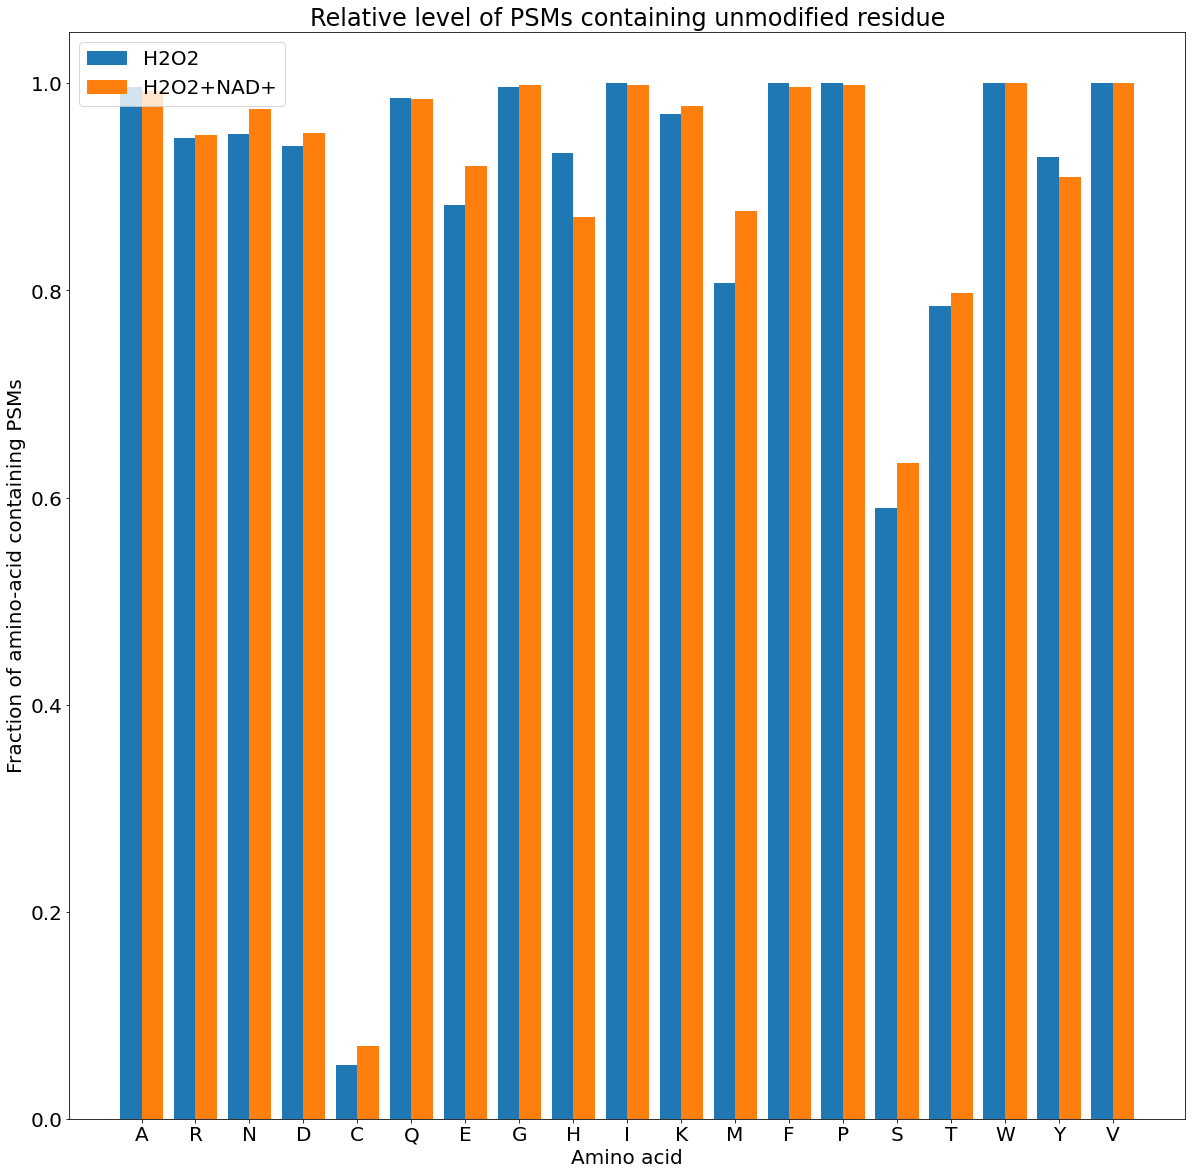

In [279]:
x = RPM2["Amino acid"]
xnone = RPM2["Relative level of PSMs containing unmodified residue_H2O2"]
xH = RPM2['Relative level of PSMs containing unmodified residue_H2O2+NAD']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'H2O2')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2+NAD+')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

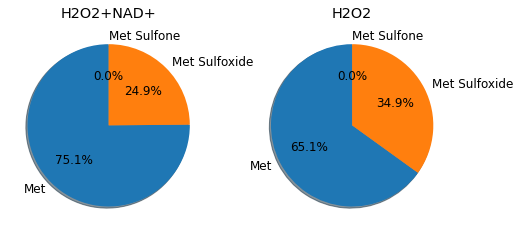

In [292]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(NADrep, ax1)
OA.methionine_overview(H2O2rep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2+NAD+")
ax2.set_title("H2O2")
plt.rcParams['font.size'] = 20
plt.show()

## 3) H2O2 + PARP-1 targeting siRNA vs H2O2

In [293]:
print("There are this many replicates of the H2O2 + PARP-1 siRNA treatment: {}".format(H2O2_siRNA["spectrum_file"].nunique()))

There are this many replicates of the H2O2 + PARP-1 siRNA treatment: 4


In [295]:
H2O2_siRNArep = OA.replicate_filter(H2O2_siRNA, 2)

In [296]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 + siRNA treatment subset: {}".format((H2O2_siRNArep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: {}".format((H2O2rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 + siRNA treatment subset: 6.083650190114068 %
The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: 5.961015412511332 %


In [297]:
mrH2O2_siRNArep = OA.modratios(H2O2_siRNArep)

In [300]:
modr3 = pd.merge(mrH2O2_siRNArep,mrH2O2rep, on="Modification", suffixes=('_H2O2+siRNA', '_H2O2'))
modr3["Difference"] = modr3["Ratios_H2O2+siRNA"] - modr3["Ratios_H2O2"]
modr3 = modr3.drop(modr3[(modr3["Ratios_H2O2+siRNA"] == 0) & (modr3["Ratios_H2O2"] == 0)].index)
modr3

,Modification,Ratios_H2O2+siRNA,Ratios_H2O2,Difference
2,[35]Oxidation[S],0.007605,0.000000,0.007605
7,[35]Oxidation[G],0.003817,0.000000,0.003817
8,[35]Oxidation[W],0.011364,0.000000,0.011364
10,[35]Oxidation[H],0.003817,0.000000,0.003817
23,[53]HNE[A],0.000000,0.012270,-0.012270
33,[345]Trioxidation[C],0.011364,0.021871,-0.010508
73,[421]Sulfide[C],0.071174,0.059579,0.011595
74,[421]Sulfide[W],0.003817,0.000000,0.003817
76,[425]Dioxidation[C],0.022472,0.023058,-0.000586
77,[425]Dioxidation[W],0.015094,0.000000,0.015094


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


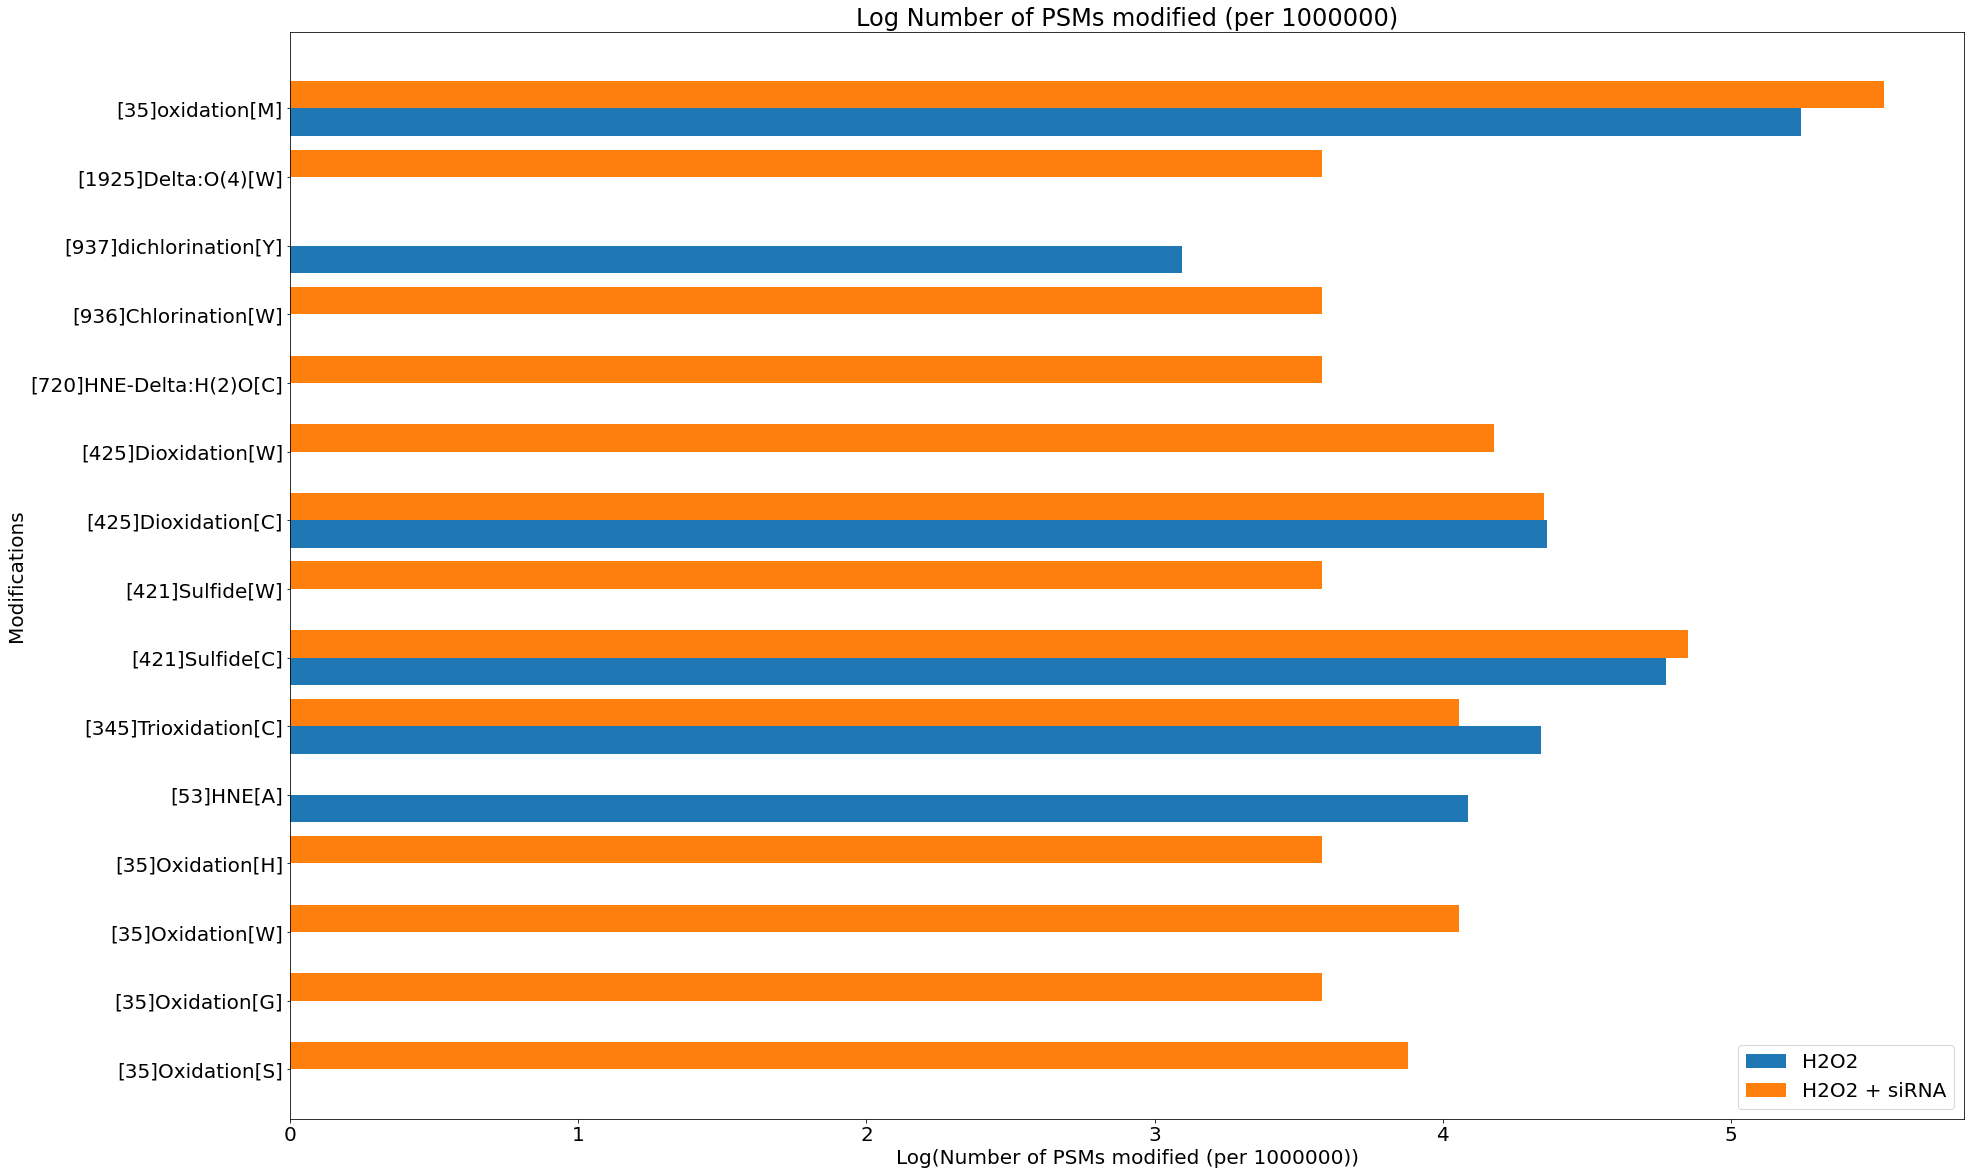

In [303]:
y = modr3["Modification"]
xnone = np.log10(modr3['Ratios_H2O2']*1000000)
xH = np.log10(modr3['Ratios_H2O2+siRNA']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'H2O2')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 + siRNA')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

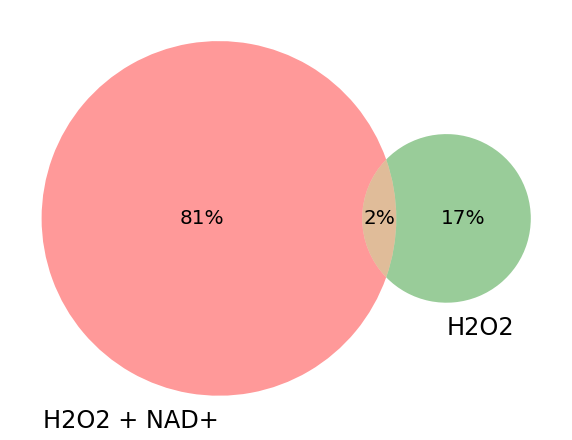

In [304]:
OA.condition_venn([H2O2_siRNArep, H2O2rep], ["H2O2 + NAD+", "H2O2"])

In [308]:
difflist3, pf_only_treatment3 = OA.comparelist(H2O2_siRNArep,H2O2rep)
pf_only_treatment3.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
14364,0_6465_1,QE1_Sandra_PP_Exp1_Sample12,917.43638,8374.7083,2096.02134,2,IHIGSSPK,IHIGSSPK,5|[21]Phospho[S],5|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,IHIGS[21]PhosphoSPK,|,[21]Phospho[S],False
14365,0_6470_1,QE1_Sandra_PP_Exp1_Sample12,998.47776,9554.7230,2096.67096,2,QNEINNPK,QNEINNPK,0|[5]Carbamyl[N-TERM],0|43.0058,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,QNEINNPK,|,[5]Carbamyl[N-TERM],False
14368,0_6481_1,QE1_Sandra_PP_Exp1_Sample12,1545.65695,14656.9093,2098.29000,2,AGSSPAQGAQNEPPR,AGSSPAQGAQNEPPR,4|[21]Phospho[S],4|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,AGSS[21]PhosphoPAQGAQNEPPR,|,[21]Phospho[S],False
14369,0_6485_1,QE1_Sandra_PP_Exp1_Sample12,1710.68345,16307.1826,2098.81014,2,SRDSGDENEPIQER,SRDSGDENEPIQER,6|[21]Phospho[D],6|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,SRDSGD[21]PhosphoENEPIQER,|,[21]Phospho[D],False
14375,0_6510_1,QE1_Sandra_PP_Exp1_Sample12,2750.01622,25900.8374,2102.53026,3,SDGACDSPSSDKENSSQIAQDHQK,SDGACDSPSSDKENSSQIAQDHQK,5|[4]carbamidomethyl[C]|9|[898]pyrophospho[S],5|57.0215|9|159.9327,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,SDGAC[4]carbamidomethylDSPS[898]pyrophosphoSDK...,|,"[[4]carbamidomethyl[C], [898]pyrophospho[S]]",False


In [312]:
onlytreatment3 = OA.modcounts(pf_only_treatment3)
onlytreatment3 = onlytreatment3.sort_values("Counts", ascending=False).drop(onlytreatment3[onlytreatment3["Counts"] == 0].index, axis=0)
onlytreatment3

,Modification,Counts
129,[35]oxidation[M],265
73,[421]Sulfide[C],37
76,[425]Dioxidation[C],12
77,[425]Dioxidation[W],8
8,[35]Oxidation[W],6
33,[345]Trioxidation[C],4
2,[35]Oxidation[S],4
7,[35]Oxidation[G],2
124,[1925]Delta:O(4)[W],2
10,[35]Oxidation[H],2


In [314]:
RPMH2O2_siRNA = OA.relative_PSM_modification(H2O2_siRNArep)

In [315]:
RPM3 = pd.merge(RPMH2O2_siRNA,RPMH2O2, on="Amino acid", suffixes=('_H2O2_siRNA', '_H2O2'))
RPM3

,Amino acid,Relative level of PSMs containing unmodified residue_H2O2_siRNA,Relative level of PSMs containing unmodified residue_H2O2
0,A,0.998890,0.996404
1,R,0.963834,0.946774
2,N,0.979048,0.951323
3,D,0.862252,0.939331
4,C,0.074380,0.052061
5,Q,0.987285,0.985441
6,E,0.789298,0.882217
7,G,0.999434,0.996568
8,H,0.917068,0.932449
9,I,1.000000,1.000000


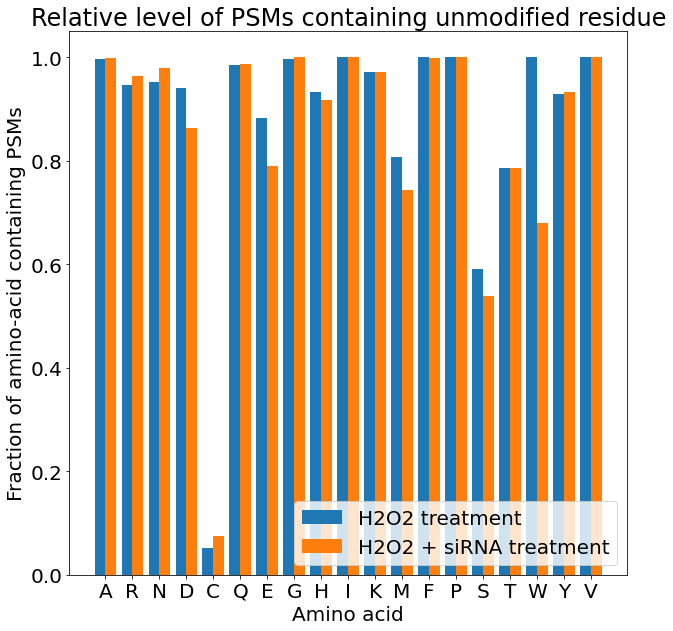

In [322]:
x = RPM3["Amino acid"]
xnone = RPM3["Relative level of PSMs containing unmodified residue_H2O2"]
xH = RPM3['Relative level of PSMs containing unmodified residue_H2O2_siRNA']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'H2O2 treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2 + siRNA treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

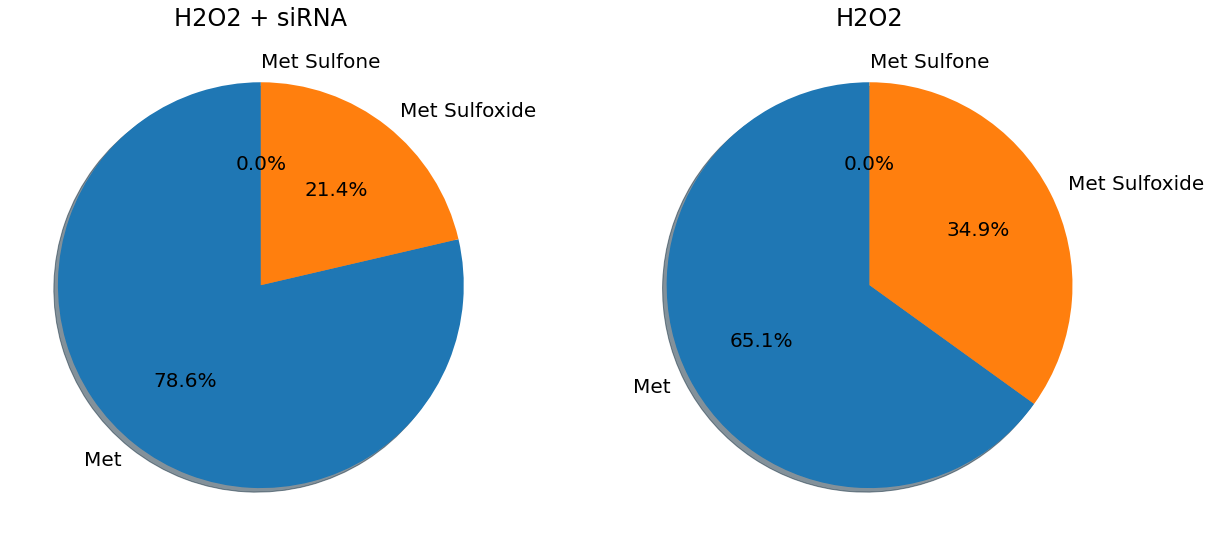

In [323]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(H2O2_siRNArep, ax1)
OA.methionine_overview(H2O2rep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2 + siRNA")
ax2.set_title("H2O2")
plt.show()

## 4) H2O2 + PJ34 vs H2O2 

In [325]:
print("There are this many replicates of the H2O2 + PJ34 treatment: {}".format(PJ34["spectrum_file"].nunique()))

There are this many replicates of the H2O2 + PJ34 treatment: 8


In [327]:
PJ34rep = OA.replicate_filter(PJ34,4)

In [328]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: {}".format((H2O2rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the H2O2 + PJ34 treatment subset: {}".format((PJ34rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: 5.961015412511332 %
The ratio of PSMs that contain an oxidative modification in the H2O2 + PJ34 treatment subset: 7.3588134626354815 %


In [335]:
mrPJ34rep = OA.modratios(PJ34)

In [331]:
modr4 = pd.merge(mrPJ34rep,mrH2O2rep, on="Modification", suffixes=('_PJ34', '_H2O2'))
modr4["Difference"] = modr4["Ratios_PJ34"] - modr4["Ratios_H2O2"]
modr4 = modr4.drop(modr4[(modr4["Ratios_PJ34"] == 0) & (modr4["Ratios_H2O2"] == 0)].index)
modr4

,Modification,Ratios_PJ34,Ratios_H2O2,Difference
0,[35]Oxidation[T],0.000140,0.000000,0.000140
1,[35]Oxidation[E],0.001956,0.000000,0.001956
2,[35]Oxidation[S],0.000280,0.000000,0.000280
5,[35]Oxidation[I],0.002514,0.000000,0.002514
7,[35]Oxidation[G],0.000839,0.000000,0.000839
...,...,...,...,...
120,[1918]Carbonyl[V],0.000280,0.000000,0.000280
121,[1922]Pro->HAVA[P],0.002653,0.000000,0.002653
124,[1925]Delta:O(4)[W],0.000560,0.000000,0.000560
126,[1927]Delta:H(4)C(5)O(1)[R],0.001538,0.000000,0.001538


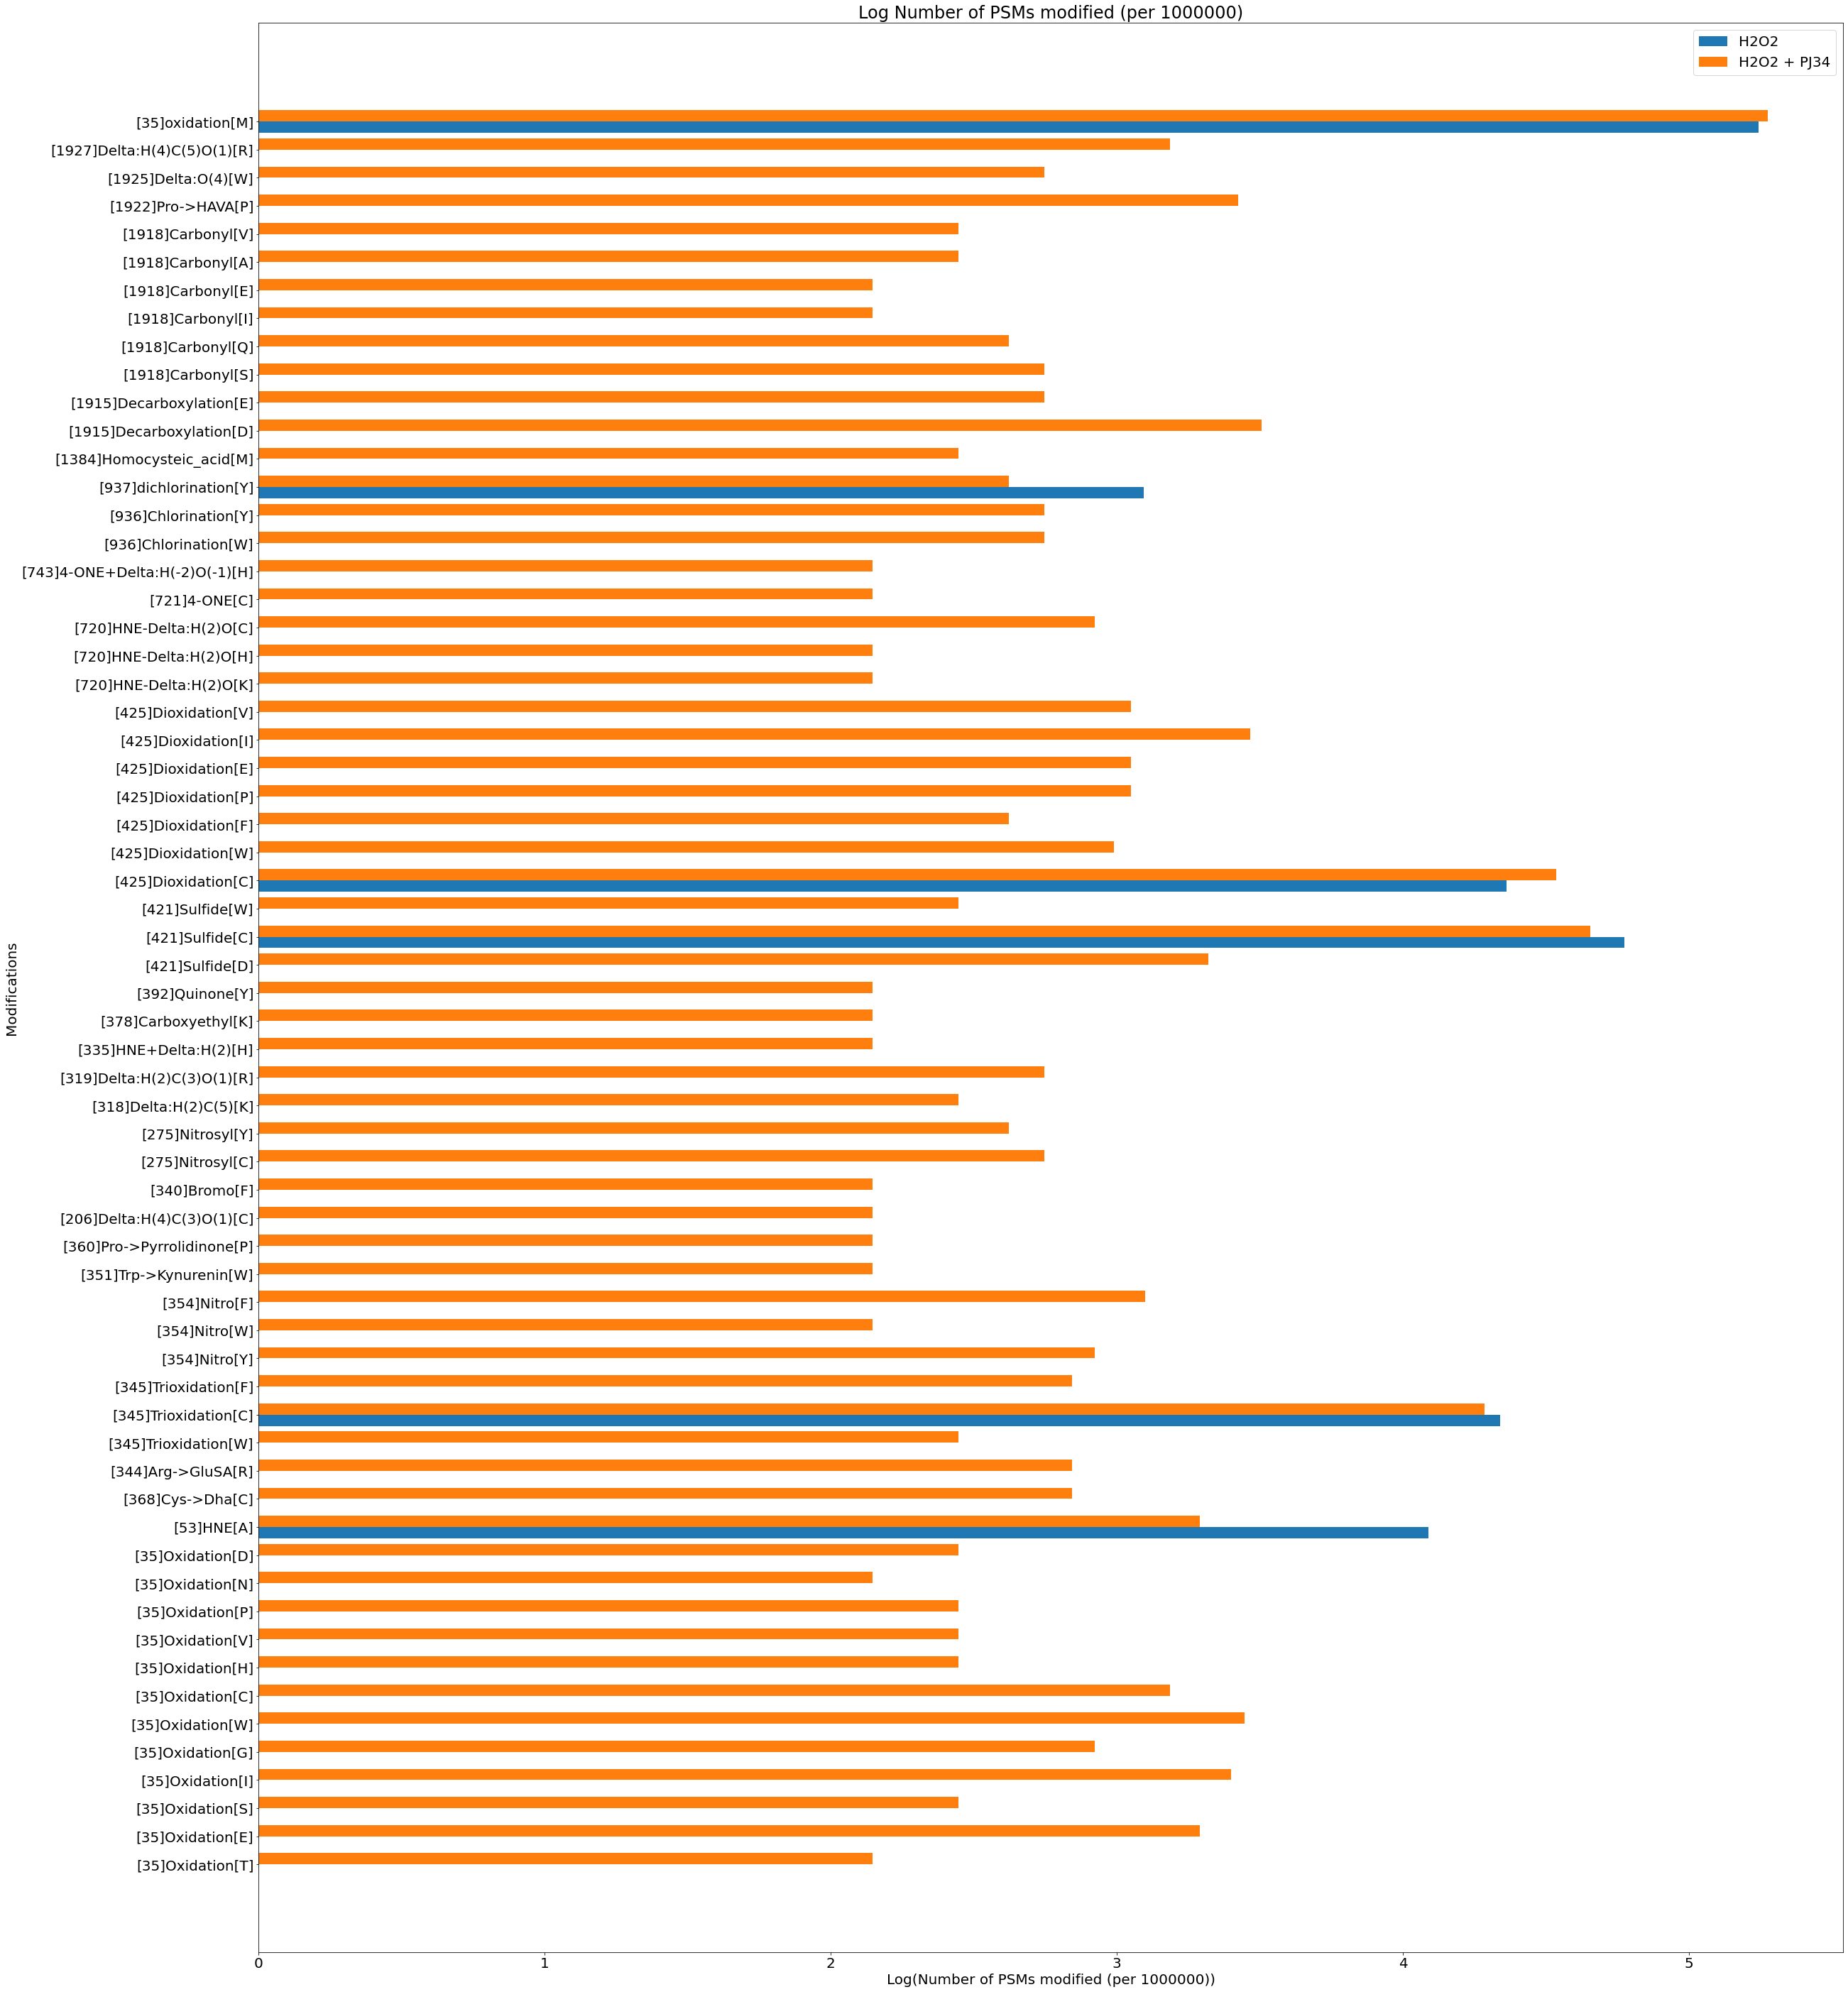

In [340]:
y = modr4["Modification"]
xnone = np.log10(modr4['Ratios_H2O2']*1000000)
xH = np.log10(modr4['Ratios_PJ34']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(40,50))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'H2O2')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 + PJ34')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

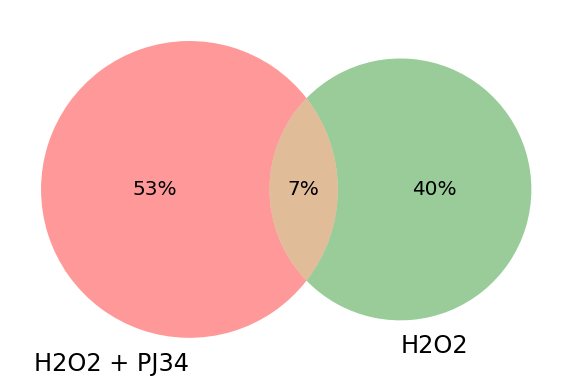

In [341]:
OA.condition_venn([PJ34rep, H2O2rep], ["H2O2 + PJ34", "H2O2"])

In [348]:
difflist4, pf_only_treatment4 = OA.comparelist(PJ34rep,H2O2rep)
pf_only_treatment4.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
133328,0_5383_1,QE1_Sandra_PP_Sample03,1359.61538,13596.1671,2308.14150,3,TTHFVEGGDAGNR,TTHFVEGGDAGNR,None,0|,...,PJ34 (PARP-1 inhibitor),1.0,30,0,NaN,First,TTHFVEGGDAGNR,|,None,False
133331,0_5393_2,QE1_Sandra_PP_Sample03,1357.63474,13576.3612,2309.38236,2,YSGSEGSTQTITK,YSGSEGSTQTITK,None,0|,...,PJ34 (PARP-1 inhibitor),1.0,30,0,NaN,First,YSGSEGSTQTITK,|,None,False
133338,0_5463_1,QE1_Sandra_PP_Sample03,1507.72674,14277.6198,2320.30752,3,AVTIANSPSKPSEK,AVTIANSPSKPSEK,7|[21]Phospho[S],7|79.9663,...,PJ34 (PARP-1 inhibitor),1.0,30,0,NaN,First,AVTIANS[21]PhosphoPSKPSEK,|,[21]Phospho[S],False
133339,0_5464_1,QE1_Sandra_PP_Sample03,1507.72690,14277.6198,2320.43826,2,AVTIANSPSKPSEK,AVTIANSPSKPSEK,7|[21]Phospho[S],7|79.9663,...,PJ34 (PARP-1 inhibitor),1.0,30,0,NaN,First,AVTIANS[21]PhosphoPSKPSEK,|,[21]Phospho[S],False
133363,0_5651_1,QE1_Sandra_PP_Sample03,1061.49045,10614.9237,2347.81014,2,ATMQNINDR,ATMQNINDR,None,0|,...,PJ34 (PARP-1 inhibitor),1.0,30,0,NaN,First,ATMQNINDR,|,None,False


In [349]:
onlytreatment4 = OA.modcounts(pf_only_treatment4)
onlytreatment4 = onlytreatment4.sort_values("Counts", ascending=False).drop(onlytreatment4[onlytreatment4["Counts"] == 0].index, axis=0)
onlytreatment4

,Modification,Counts
129,[35]oxidation[M],154
73,[421]Sulfide[C],49
76,[425]Dioxidation[C],20
33,[345]Trioxidation[C],17
8,[35]Oxidation[W],5
34,[345]Trioxidation[F],4
72,[421]Sulfide[D],4
87,[425]Dioxidation[V],4
9,[35]Oxidation[C],1


In [350]:
RPMPJ34 = OA.relative_PSM_modification(PJ34rep)

In [351]:
RPM4 = pd.merge(RPMPJ34, RPMH2O2, on="Amino acid", suffixes=('_PJ34', '_H2O2'))
RPM4 

,Amino acid,Relative level of PSMs containing unmodified residue_PJ34,Relative level of PSMs containing unmodified residue_H2O2
0,A,0.996828,0.996404
1,R,0.953125,0.946774
2,N,0.970641,0.951323
3,D,0.941208,0.939331
4,C,0.068607,0.052061
5,Q,0.987938,0.985441
6,E,0.890500,0.882217
7,G,1.000000,0.996568
8,H,0.900990,0.932449
9,I,1.000000,1.000000


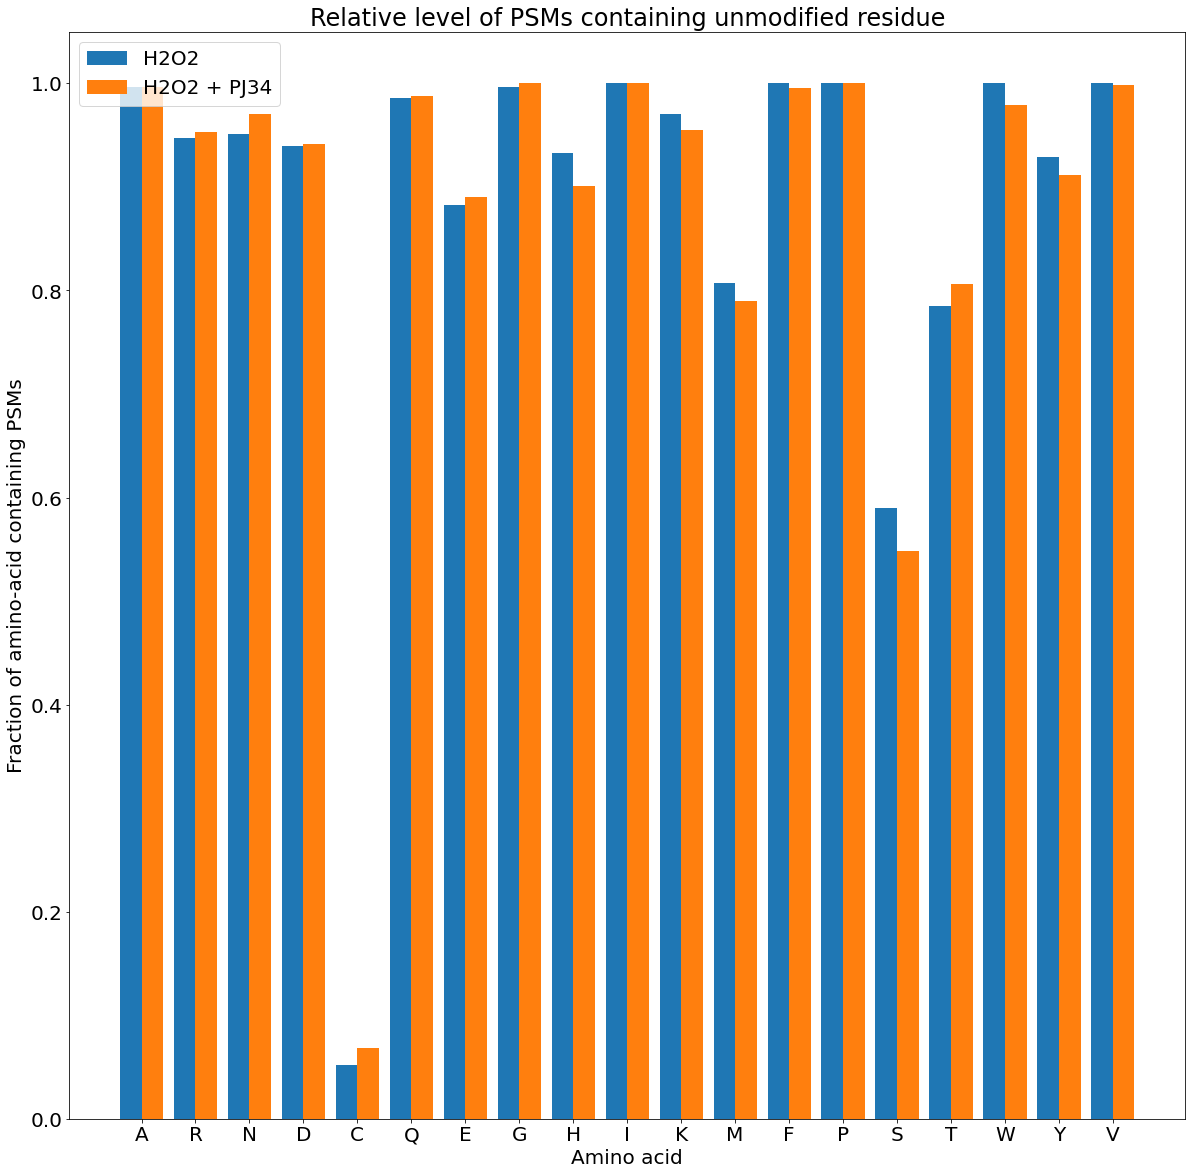

In [352]:
x = RPM4["Amino acid"]
xnone = RPM4["Relative level of PSMs containing unmodified residue_H2O2"]
xH = RPM4['Relative level of PSMs containing unmodified residue_PJ34']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'H2O2')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2 + PJ34')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

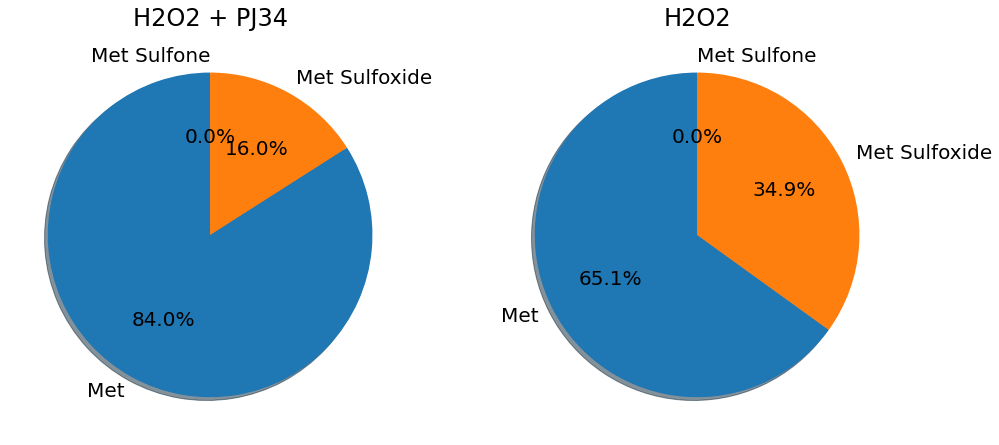

In [360]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(PJ34rep, ax1)
OA.methionine_overview(H2O2rep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2 + PJ34")
ax2.set_title("H2O2")
plt.rcParams["figure.figsize"] = (18,18) 
plt.show()

## 5) H2O2 + PARP-1 siRNA vs None + PARP-1 siRNA

In [361]:
print("There are this many replicates of each treatment: {}".format(Control_siRNA["spectrum_file"].nunique()))

There are this many replicates of each treatment: 4


In [363]:
Control_siRNArep = OA.replicate_filter(Control_siRNA, 2)

In [364]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 + siRNA treatment subset: {}".format((H2O2_siRNArep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control + siRNA treatment subset: {}".format((Control_siRNArep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 + siRNA treatment subset: 6.083650190114068 %
The ratio of PSMs that contain an oxidative modification in the Control + siRNA treatment subset: 4.671877840392656 %


In [365]:
mrControl_siRNArep = OA.modratios(Control_siRNArep)

In [366]:
modr5 = pd.merge(mrH2O2_siRNArep,mrControl_siRNArep, on="Modification", suffixes=('_H2O2+siRNA', '_Control+siRNA'))
modr5["Difference"] = modr5["Ratios_H2O2+siRNA"] - modr5["Ratios_Control+siRNA"]
modr5 = modr5.drop(modr5[(modr5["Ratios_H2O2+siRNA"] == 0) & (modr5["Ratios_Control+siRNA"] == 0)].index)
modr5

,Modification,Ratios_H2O2+siRNA,Ratios_Control+siRNA,Difference
0,[35]Oxidation[T],0.000000,0.004598,-0.004598
2,[35]Oxidation[S],0.007605,0.000000,0.007605
5,[35]Oxidation[I],0.000000,0.004598,-0.004598
7,[35]Oxidation[G],0.003817,0.000000,0.003817
8,[35]Oxidation[W],0.011364,0.004598,0.006766
10,[35]Oxidation[H],0.003817,0.004598,-0.000781
33,[345]Trioxidation[C],0.011364,0.013667,-0.002304
51,[340]Bromo[H],0.000000,0.004598,-0.004598
72,[421]Sulfide[D],0.000000,0.009153,-0.009153
73,[421]Sulfide[C],0.071174,0.084567,-0.013392


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


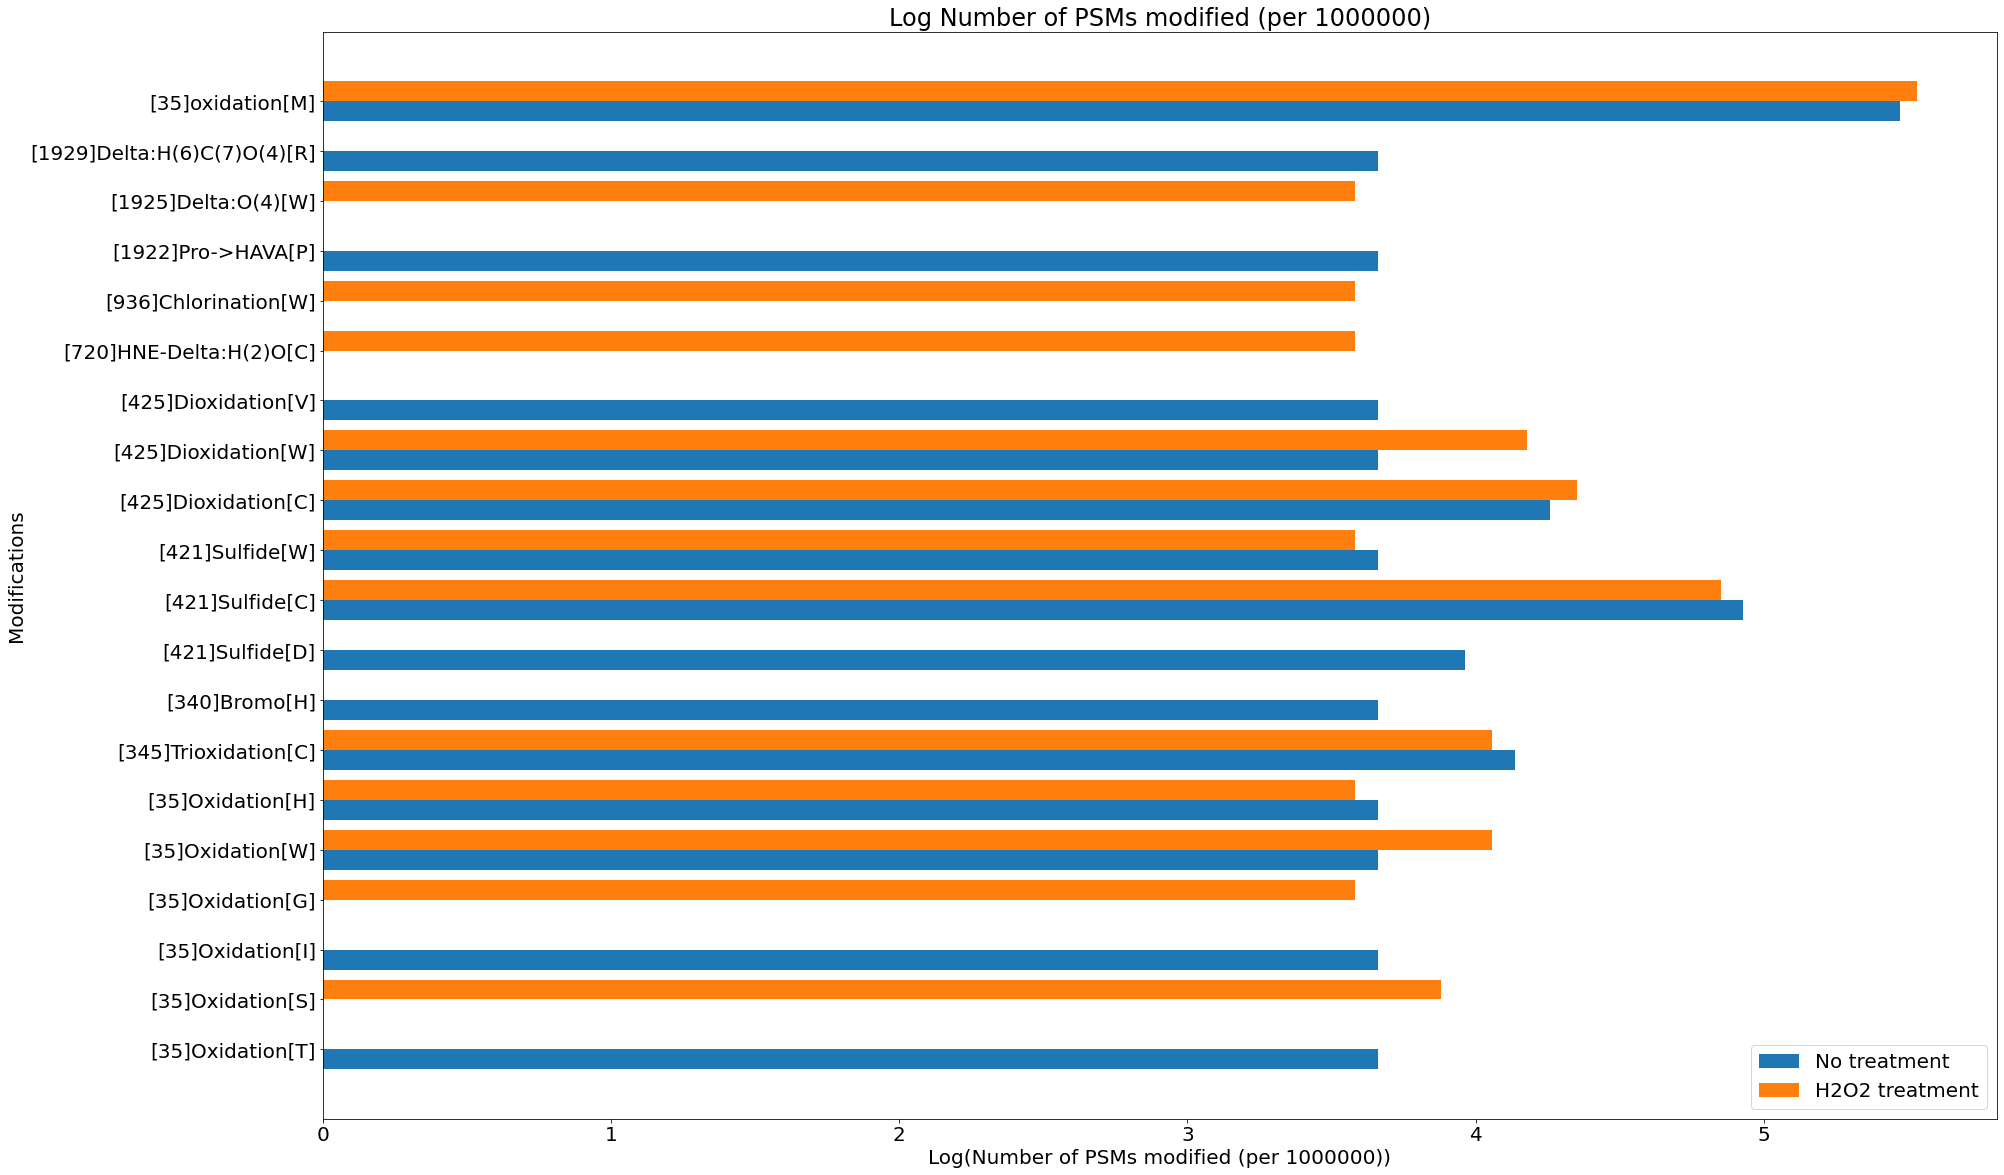

In [368]:
y = modr5["Modification"]
xnone = np.log10(modr5['Ratios_Control+siRNA']*1000000)
xH = np.log10(modr5['Ratios_H2O2+siRNA']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

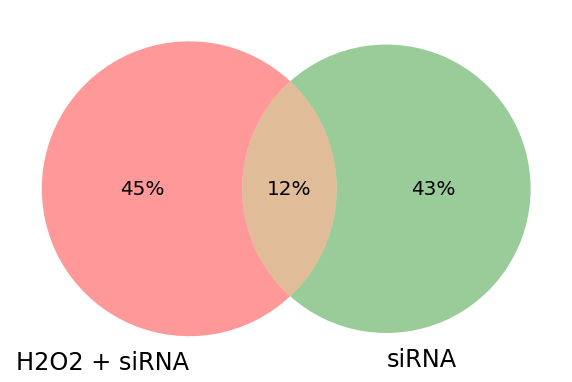

In [369]:
OA.condition_venn([H2O2_siRNArep,Control_siRNArep],["H2O2 + siRNA", "siRNA"])

In [370]:
difflist5, pf_only_treatment5 = OA.comparelist(H2O2_siRNArep, Control_siRNArep)
pf_only_treatment5.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
14364,0_6465_1,QE1_Sandra_PP_Exp1_Sample12,917.43638,8374.7083,2096.02134,2,IHIGSSPK,IHIGSSPK,5|[21]Phospho[S],5|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,IHIGS[21]PhosphoSPK,|,[21]Phospho[S],False
14365,0_6470_1,QE1_Sandra_PP_Exp1_Sample12,998.47776,9554.7230,2096.67096,2,QNEINNPK,QNEINNPK,0|[5]Carbamyl[N-TERM],0|43.0058,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,QNEINNPK,|,[5]Carbamyl[N-TERM],False
14375,0_6510_1,QE1_Sandra_PP_Exp1_Sample12,2750.01622,25900.8374,2102.53026,3,SDGACDSPSSDKENSSQIAQDHQK,SDGACDSPSSDKENSSQIAQDHQK,5|[4]carbamidomethyl[C]|9|[898]pyrophospho[S],5|57.0215|9|159.9327,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,SDGAC[4]carbamidomethylDSPS[898]pyrophosphoSDK...,|,"[[4]carbamidomethyl[C], [898]pyrophospho[S]]",False
14379,0_6529_2,QE1_Sandra_PP_Exp1_Sample12,1568.68076,14887.1683,2105.18664,2,ASVSQTSPQSASSPR,ASVSQTSPQSASSPR,6|[21]Phospho[T],6|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,ASVSQT[21]PhosphoSPQSASSPR,|,[21]Phospho[T],False
14381,0_6543_1,QE1_Sandra_PP_Exp1_Sample12,1479.66123,13996.9430,2107.18224,2,PIQGSQGSSSPVEK,PIQGSQGSSSPVEK,9|[21]Phospho[S],9|79.9663,...,PARP-1 targeting siRNA,0.05,30,0,NaN,First,PIQGSQGSS[21]PhosphoSPVEK,|,[21]Phospho[S],False


In [372]:
onlytreatment5 = OA.modcounts(pf_only_treatment5)
onlytreatment5 = onlytreatment5.sort_values("Counts", ascending=False).drop(onlytreatment5[onlytreatment5["Counts"] == 0].index, axis=0)
onlytreatment5

,Modification,Counts
129,[35]oxidation[M],236
73,[421]Sulfide[C],27
76,[425]Dioxidation[C],8
8,[35]Oxidation[W],6
33,[345]Trioxidation[C],6
2,[35]Oxidation[S],4
74,[421]Sulfide[W],2
7,[35]Oxidation[G],2
94,[720]HNE-Delta:H(2)O[C],2
124,[1925]Delta:O(4)[W],2


In [373]:
RPMControl_siRNA = OA.relative_PSM_modification(Control_siRNArep)

In [374]:
RPM5 = pd.merge(RPMH2O2_siRNA,RPMControl_siRNA, on="Amino acid", suffixes=('_H2O2+siRNA', '_Control+siRNA'))
RPM5

,Amino acid,Relative level of PSMs containing unmodified residue_H2O2+siRNA,Relative level of PSMs containing unmodified residue_Control+siRNA
0,A,0.998890,0.999401
1,R,0.963834,0.970069
2,N,0.979048,0.969724
3,D,0.862252,0.859371
4,C,0.074380,0.049153
5,Q,0.987285,0.990741
6,E,0.789298,0.766820
7,G,0.999434,0.999412
8,H,0.917068,0.897361
9,I,1.000000,0.999486


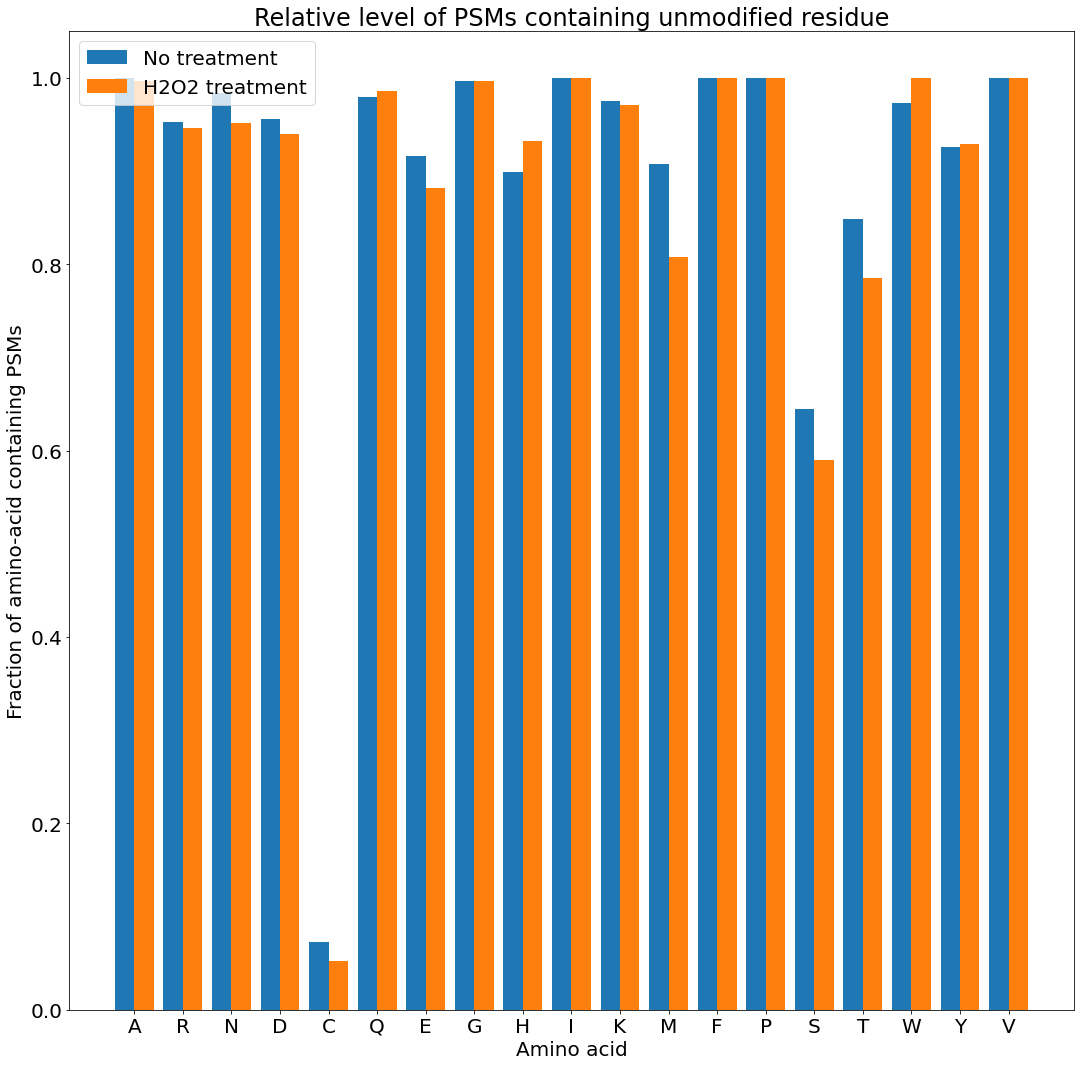

In [375]:
x = RPM["Amino acid"]
xnone = RPM["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM['Relative level of PSMs containing unmodified residue_H2O2']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

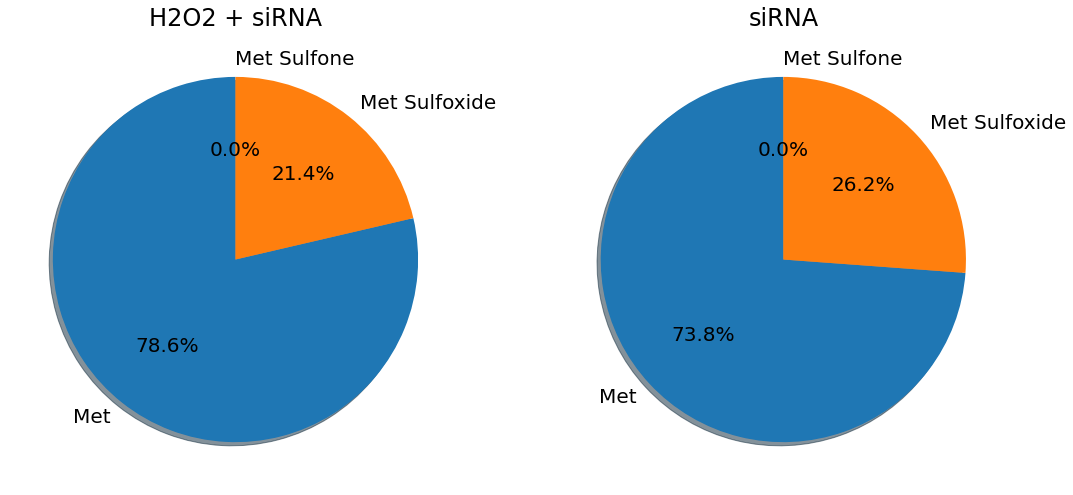

In [378]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(H2O2_siRNArep, ax1)
OA.methionine_overview(Control_siRNArep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2 + siRNA")
ax2.set_title("siRNA")
plt.rcParams["figure.figsize"] = (18,18) 
plt.show()